**计算物理学(A)作业1: 函数插值和近似**

姓名：刘思瑞

学号：2100017810

注意：请使用Python语言完成所有编程作业。允许并鼓励同学间合作，但严禁抄袭别人的代码，且严禁直接抄袭ChatGPT的代码；请直接在题干后附加代码块和必要的公式，讨论等；作图请包含x,y轴label，以及必要的图例。过多信息的缺失可能会导致丢分。

作业提交只需直接提交这个完成后的jupyter notebook，并命名为"姓名-学号-作业x.ipynb"。

另外请在作业最后**简要说明本次作业完成情况**，以及大致心路历程(示例：共3小时，其中第一题1小时比较顺利，第二题遇到了xxx坑，调了一会找xxx同学讨论了一下，2小时调好了xxx的bug)；另外标注**致谢**，借助了哪位同学/ChatGPT等工具的帮助，如果自己独立完成的，只需标注"独立完成"。如果上述备注有缺失，会导致作业扣分！

本次作业额外注意事项：请勿调用`scipy.interpolate`等其他插值的包；请勿调用`numpy.polynomial`等直接求多项式展开系数的包；

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

**1 函数插值的Runge现象**

本练习旨在让大家体会一下Runge现象，以及怎么规避这种现象。

我们考虑函数$R(x)=1/(1+25x^2)$在区间$[-1,1]$上的插值.

**(a)** 使用拉格朗日插值法，均匀选取区间上$n+1$个点作为采样点（包括两端端点，相隔$2/n$取一个点），得到内插结果$P_n(x)$。分别取$n=5,10,15,20$，
画图展示$R(x)$和$P_n(x)$，观察$P_n(x)$越来越大的振荡。这就是著名的Runge现象。

**(b)** 造成这种现象的主要原因是，拉格朗日插值使用的函数基组${1, x, x^2, ...}$并不是正交基。这会导致大的基组的函数之间会有很强的overlap，从而导致插值结果十分病态。因此，我们的修复方案就是使用正交基组展开。请使用Cherbyshev多项式$T_n(x)$分别取$n=5,10,15,20$，**重复(a)问的操作**，核实这样得到的结果就不会有Runge现象。

**Hint**：以上插值本质上就是函数按给定基组展开+代入插值点求解系数。如果你懒得翻讲义，这里友情给出Cherbyshev插值的公式：
$$
R(x)=\frac{c_0}{2} + \sum_{k=1}^{N-1}c_k T_k(x)，\quad T_n(x)=\cos(n\arccos(x)),   x \in [−1,1]\\

c_m=\frac{2}{N} \sum_{k=0}^{N-1} R\left[\cos \left(\frac{\pi\left(k+\frac{1}{2}\right)}{N}\right)\right] \cos \left(\frac{\pi m(k+1 / 2)}{N}\right), \quad m=0,1, \ldots, N-1
$$

其中$c_m$的表达式来源于$T_n(x)$特有的分立的正交归一性；

(a)

先画出Rauge函数

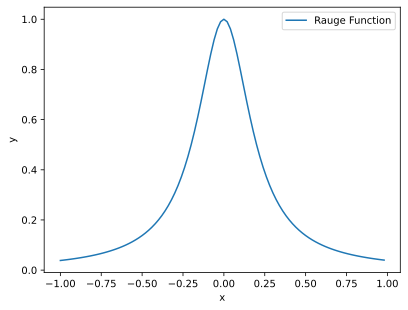

In [3]:
x = np.arange(-1,1,0.02)
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

接下来计算拉格朗日插值：

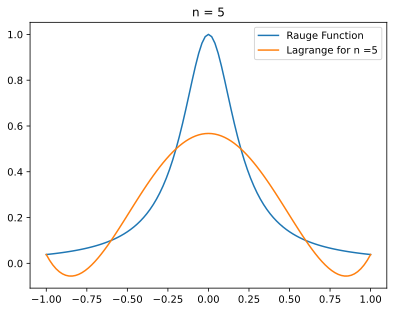

In [5]:
def L(num, x, y, i, z):
    m = 1
    for j in range(num+1):
        if i != j:
            m *= (z - x[j])/(x[i] - x[j])
    return m*y[i]

def lag(num):
    x = np.append(np.arange(-1,1,2.0/num),[1])
    y = [ 1/(1+25*_**2) for _ in x]
    x_ = np.append(np.arange(-1,1,0.02),[1])
    y_ = []
    for t in x_:
        temp = 0
        for i in range(num+1):
            temp += L(num,x,y,i,t)
        y_.append(temp)
    plt.plot(x_,y_,label="Lagrange for n =" + str(num))
    plt.title("n = " +  str(num))
    plt.legend()

x = np.append(np.arange(-1,1,0.02),[1])
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
lag(5)

上图为n= 5

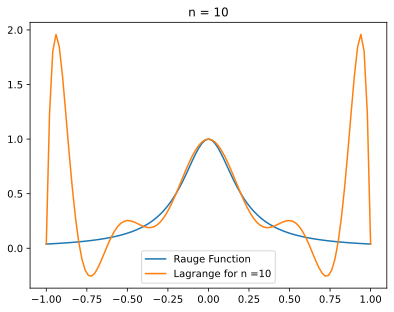

In [36]:
x = np.append(np.arange(-1,1,0.02),[1])
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
lag(10)

上图为n= 10

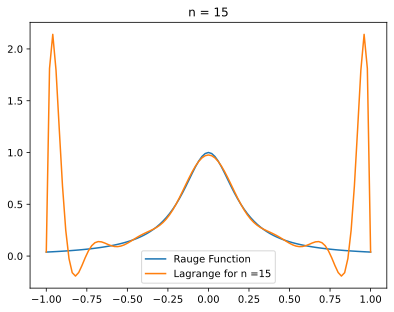

In [37]:
x = np.append(np.arange(-1,1,0.02),[1])
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
lag(15)

上图为n = 15


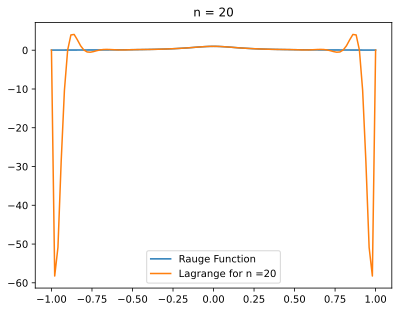

In [6]:
x = np.append(np.arange(-1,1,0.02),[1])
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
lag(20)

上图 n=20，边界的误差已经非常不能称之为误差了，随着中间区域的拟合提升，两侧发散的越来越快

(b)

下面构造切比雪夫插值

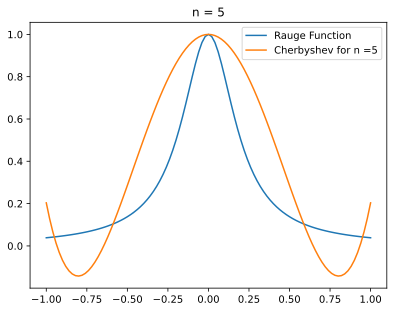

In [45]:
import math
def ck(num,i):
    m = 0
    for j in range(num):
        m += math.cos(math.pi * i * (j+0.5)/num)*(1/(1+25*(math.cos(math.pi * (j+0.5)/num))**2))
    return m *2/num
def T(n,x):
    if n == 0:
        return 0.5
    return math.cos(n* math.acos(x))
def c(num):
    x_ = np.append(np.arange(-1,1,0.02),[1])
    y_ = []
    for t in x_:
        temp = 0
        for i in range(num):
            temp +=  ck(num,i) * T(i,t)
        y_.append(temp)
    plt.plot(x_,y_,label="Cherbyshev for n =" + str(num))
    plt.title("n = " +  str(num))
    plt.legend()

x = np.append(np.arange(-1,1,0.02),[1])
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
c(5)

上图为n = 5

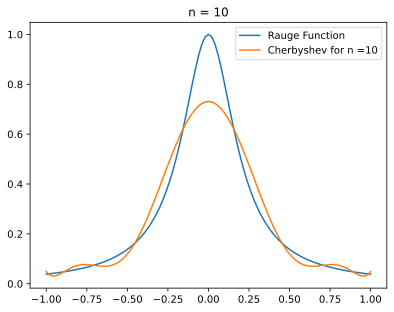

In [46]:
x = np.append(np.arange(-1,1,0.02),[1])
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
c(10)

上图为n = 10

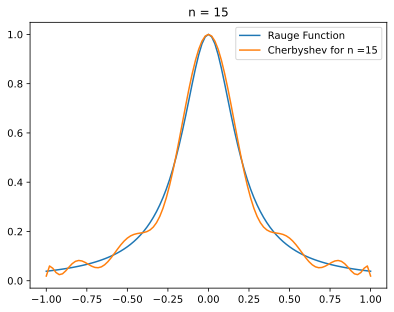

In [47]:
x = np.append(np.arange(-1,1,0.02),[1])
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
c(15)

上图为n = 15

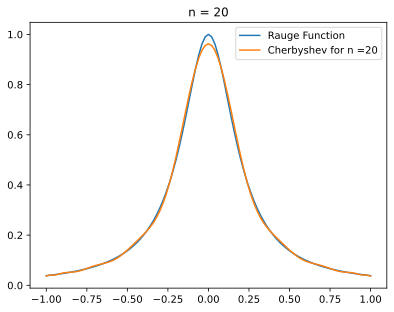

In [48]:
x = np.append(np.arange(-1,1,0.02),[1])
y = [ 1/(1+25*_**2) for _ in x]
plt.plot(x,y,label="Rauge Function")
c(20)

上图为n = 20，可以看到由于选取了正交基，基本是收敛的

**2 三次样条插值实战**

在本次练习中，你将使用助教预先提供的一部分代码完成极坐标曲线 $r(\theta)=1+\cos \theta$ 的三次样条平滑插值。

策略如下：我们可以分别对 $x=r(\theta)\cos{\theta}$ 和 $y=r(\theta)\sin{\theta}$ 进行插值。均匀选取 $n$ 个点 $\theta=t \frac{2 \pi}{n-1}, t=0,1, \cdots, n-1$;取 $n=9$ 得到$x(t_i)$和$y(t_i)$。注意这里我们统一使用边界条件为：两端边界二阶导为0。

这样我们就可以对$x,y$ 分别进行三次样条插值，最后将两条平滑的曲线合并得到一条平滑的极坐标曲线。

**(a)** 阅读助教在接下来的代码块里提供的函数，请参考讲义，并尽量不参考ChatGPT，用不多于100字和必要的公式描述函数`cube_spline`和`spl_output`的功能，不必描述实现的原理；理论上调用这些函数就可以很容易得到本题的结果。当然，如果你决定自己从头写一遍此任务，可以忽略此问（乐；

**(b)** 使用你读懂了的这些代码，按照上述描述的策略修改/补全`draw_cubic_spline`函数并画出三张图：插值得到的平滑 $x(t), y(t)$ 和 $r(\theta)$。


In [49]:
def cube_spline(y, t):
    # tri-diagonal matrix H
    n = len(t)
    d = np.zeros(n)
    H = np.zeros((n, n))
    H[0][0], H[-1][-1] = 1, 1
    for i in range(1, n - 1):
        d[i] = (y[i + 1] - y[i]) / (t[i + 1] - t[i]) - \
            (y[i] - y[i - 1]) / (t[i] - t[i - 1])
        H[i][i] = (t[i + 1] - t[i - 1]) / 3
        H[i][i - 1] = (t[i] - t[i - 1]) / 6
        H[i - 1][i] = (t[i + 1] - t[i]) / 6
    
    return np.linalg.solve(H, d)

def spl_output(M1, M2, x1, x2, y1, y2, x): # output for a given value x in [x1, x2]
    A = (y2 - y1) / (x2 - x1) - (x2 - x1) * (M2 - M1) / 6
    B = y1 - M1 * (x2 - x1) ** 2 / 6
    return M1 * (x2 - x) ** 3 / 6 / (x2 - x1) + \
        M2 * (x - x1) ** 3 / 6 / (x2 - x1) + A * (x - x1) + B

def draw_cubic_spline(n, vec_theta, vec_x, vec_y):
    M_x = cube_spline(vec_x, vec_theta)
    M_y = cube_spline(vec_y, vec_theta)
    x = []
    y = []
    for i in range(n-1):
        for j in np.append(np.arange(vec_theta[i],vec_theta[i+1],(vec_theta[i+1]-vec_theta[i])/100),[vec_theta[i+1]]):
            x.append(spl_output(M_x[i],M_x[i+1],vec_theta[i],vec_theta[i+1],vec_x[i],vec_x[i+1],j))
            y.append(spl_output(M_y[i],M_y[i+1],vec_theta[i],vec_theta[i+1],vec_y[i],vec_y[i+1],j))
    plt.plot(x,y,label = 'r_theta')
    plt.legend()

**(a)**

首先函数`cube_spline`求解的是样条函数一阶导的连续性条件：
$$
\frac{h_j}{6} M_{j-1}+\frac{h_j+h_{j+1}}{3} M_j+\frac{h_{j+1}}{6} M_{j+1}=\frac{y_{j+1}-y_j}{h_{j+1}}-\frac{y_j-y_{j-1}}{h_j}
$$

而`spl_output`求解的是$A_n$ 与 $B_n$

$$
\left\{
\begin{aligned}
&B_j=y_j-M_j \frac{h_{j+1}^2}{6}\\
&A_j=\frac{y_{j+1}-y_j}{h_{j+1}}-\frac{h_{j+1}}{6}\left(M_{j+1}-M_j\right)
\end{aligned}
\right.
$$

利用这两个函数加上规定的边界条件就可以插值得到结果

**(b)**

下面补全代码

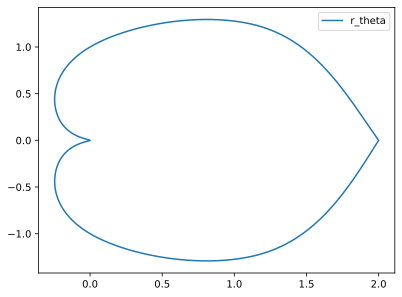

In [65]:
def draw_cubic_spline(n, vec_theta, vec_x, vec_y):
    M_x = cube_spline(vec_x, vec_theta)
    M_y = cube_spline(vec_y, vec_theta)
    x = []
    y = []
    for i in range(n-1):
        for j in np.append(np.arange(vec_theta[i],vec_theta[i+1],(vec_theta[i+1]-vec_theta[i])/100),[vec_theta[i+1]]):
            x.append(spl_output(M_x[i],M_x[i+1],vec_theta[i],vec_theta[i+1],vec_x[i],vec_x[i+1],j))
            y.append(spl_output(M_y[i],M_y[i+1],vec_theta[i],vec_theta[i+1],vec_y[i],vec_y[i+1],j))
    plt.plot(x,y,label = 'r_theta')
    plt.legend()

n = 9
vec_theta = np.append(np.arange(0,2*math.pi,2*math.pi/(n-1)),[2*math.pi])
vec_x = [math.cos(theta)*(1+math.cos(theta)) for theta in vec_theta]
vec_y = [math.sin(theta)*(1+math.cos(theta)) for theta in vec_theta]
draw_cubic_spline(n,vec_theta,vec_x,vec_y)

**作业完成情况**：大约两个小时左右，主要是第一题的python环境出了一点小问题花了不少时间。这两道题基本就是重复课上的内容还是较为容易的

**致谢**：独立完成，`numpy`部分有些不熟悉的操作查阅了python官方文档